In [7]:
import pandas as pd
from collections import Counter

In [3]:
jeju = pd.read_excel('./jeju.xlsx')

In [4]:
jeju.head()

,Unnamed: 0,content,tag,like,date,place
0,0,NaN,[],5.0,2020-03-19,NaN
1,1,NaN,[],NaN,2020-03-19,사이카레
2,2,NaN,[],NaN,2020-03-19,사이카레
3,3,NaN,[],NaN,2020-03-19,사이카레
4,4,NaN,[],44.0,2020-03-19,명월국민학교


In [6]:
jeju['tag']

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                                                    []
9                                                    []
10                                                   []
11                                                   []
12                                                   []
13                                                   []
14    ['#맛집', '#맛집탐방', '#맛집스타그램', '#맛집추천', '#맛집투어', ...
15    ['#맛집', '#맛집탐방', '#맛집스타그램', '#맛집추천', '#맛집투어', ...
16                                                   []
17    ['#제주도맛집', '#제주도여행', '#제주도민', '#제주도카페', '#

In [22]:
tags_total = []
for tags in jeju['tag']:
    tag_list = tags[2:-2].split("', '")
#    print(tag_list)
    for tag in tag_list:
        tags_total.append(tag)
        
tags_total[0:20]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '#맛집',
 '#맛집탐방',
 '#맛집스타그램',
 '#맛집추천',
 '#맛집투어',
 '#제주도맛집']

In [21]:
len(tags_total)

30

In [25]:
tags_counts = Counter()

tags_counts

Counter()

In [ ]:
tag_counts = Counter()

In [26]:
# 데이터 정제하기 데이터 필요불필요 구분
STOPWORDS = ['맛집']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS: #not in 포함이 안된다면
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(30)

[('', 24),
 ('#제주도맛집', 6),
 ('#맛집스타그램', 3),
 ('#제주맛집', 3),
 ('#소통', 3),
 ('#맛집', 2),
 ('#맛집탐방', 2),
 ('#맛집추천', 2),
 ('#맛집투어', 2),
 ('#부산맛집', 2)]

In [28]:
# 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]: # 한글이 안나온다면
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [32]:
# 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']
ag_counts_df.head()

,tags,counts
0,,24
1,#제주도맛집,6
2,#맛집스타그램,3
3,#제주맛집,3
4,#소통,3


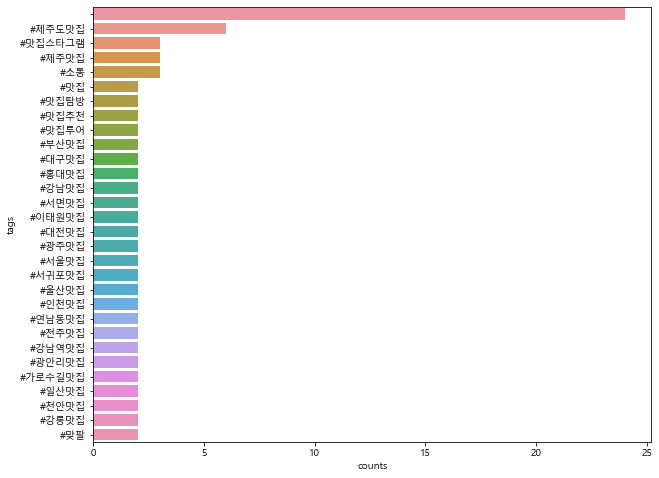

In [33]:
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [38]:
! pip install wordcloud

In [42]:
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

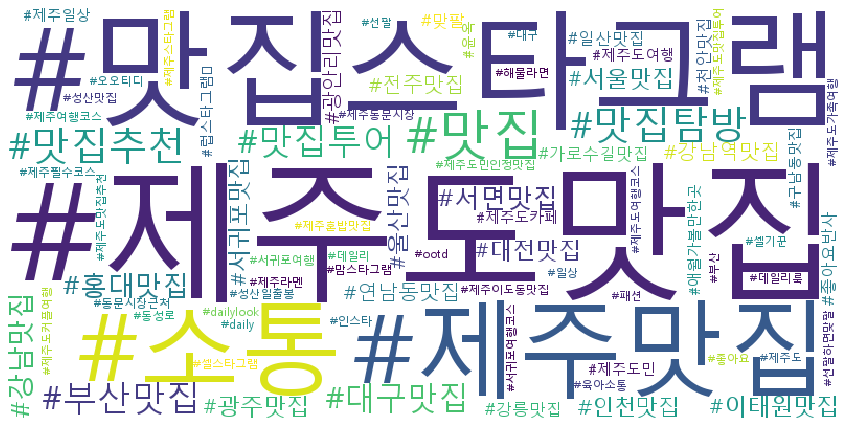

In [44]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off') # 축
plt.savefig('./3_2_tag-wordcloud.png')